# Anslysis of iDDN simulation results on different subset of the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from iddn_paper import sim3_h5op, tool_draw, tool_sys, tool_eval

# 50+50+50, 5 edges from each regulator
exp_name = "sim3_ggm_three_layer_batch_444445"

n_sample_work = 400
prior = "null"
# prior = "precise"

top_folder = tool_sys.get_work_folder() + "sim_iddn_data"
dat_file = f"{top_folder}/sim_input/{exp_name}.hdf5"

dat1, dat2, con_mat1, con_mat2, comm_gt, diff_gt, dep_mat_null, dep_mat_prior, dep_mat_prior_loose, layer_count = (
    sim3_h5op.read_sim_data(dat_file)
)


In [2]:
# Make a new mask that focus on selected nodes
n_node = dat1.shape[-1]
n_gene = layer_count[0]
# n_gene = layer_count[0] + layer_count[1]
msk_genes = np.zeros((n_node, n_node))
msk_genes[:n_gene, :n_gene] = 1

msk = np.copy(dep_mat_null)
for i in range(len(msk)):
    msk0 = msk[i]*msk_genes
    msk[i] = msk0


In [3]:
# plt.imshow(dep_mat_prior[0])
# plt.axis('off'))

In [4]:
f0 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_prior_{prior}_mrna.hdf5"
f1 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_prior_{prior}_mrna_tf.hdf5"
f2 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_prior_{prior}_mrna_mirna.hdf5"
f3 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_prior_{prior}_mrna_tf_mirna.hdf5"

# f_iddn_tfmrna_mirna_lncrna = 'E:/OneDrive - Virginia Tech/x_code/ddn/experiment_iddn_paper/sim_output/sim3_ggm_three_layer_batch_444445_ddn_sample_200_sigma_0.0.hdf5'

In [5]:
dep_iddn = tool_eval.read_res_h5(f0, tt=False)
res_comm_iddn0, res_diff_iddn0, res_g1_iddn0, res_g2_iddn0, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_iddn = tool_eval.read_res_h5(f1, tt=False)
res_comm_iddn1, res_diff_iddn1, res_g1_iddn1, res_g2_iddn1, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_iddn = tool_eval.read_res_h5(f2, tt=False)
res_comm_iddn2, res_diff_iddn2, res_g1_iddn2, res_g2_iddn2, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_iddn = tool_eval.read_res_h5(f3, tt=False)
res_comm_iddn3, res_diff_iddn3, res_g1_iddn3, res_g2_iddn3, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)


['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)


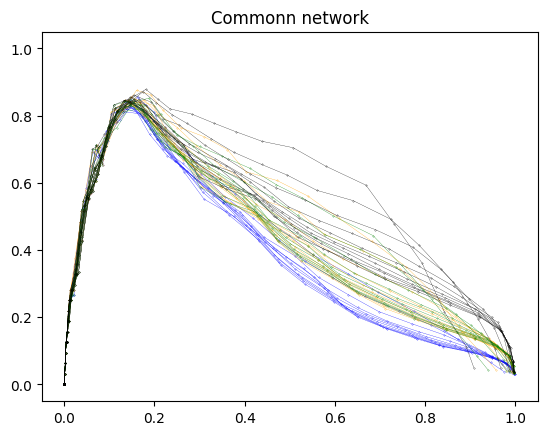

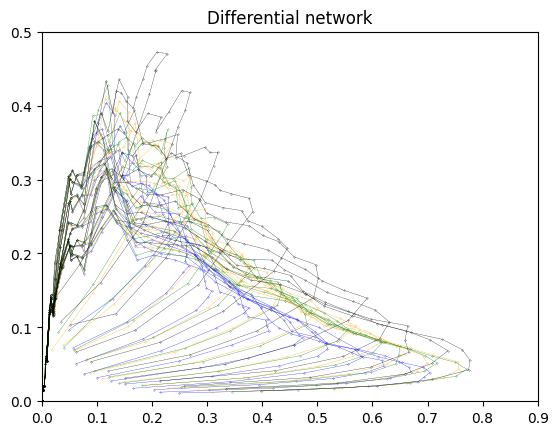

In [8]:
tool_draw.draw_lines_rho1_rho2_v1(
    # res_iddn_lst=[res_comm_iddn3],
    res_lst=[res_comm_iddn0, res_comm_iddn1, res_comm_iddn2, res_comm_iddn3],
    title="Commonn network",
)
tool_draw.draw_lines_rho1_rho2_v1(
    # res_iddn_lst=[res_diff_iddn3],
    res_lst=[res_diff_iddn0, res_diff_iddn1, res_diff_iddn2, res_diff_iddn3],
    title="Differential network",
    xlim=[0, 0.9],
    ylim=[0, 0.5],
)
